<a href="https://colab.research.google.com/github/oneupon2/Medical-Image-Classification-Using-ResNet-V2-To-Identify-Pneumonia/blob/main/pneumonia16thApril.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
!unzip /content/gdrive/MyDrive/archive.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/normal/IM-0435-0001-0001.jpeg  
  inflating: /content/train/normal/IM-0435-0001.jpeg  
  inflating: /content/train/normal/IM-0437-0001-0001.jpeg  
  inflating: /content/train/normal/IM-0437-0001-0002.jpeg  
  inflating: /content/train/normal/IM-0437-0001.jpeg  
  inflating: /content/train/normal/IM-0438-0001.jpeg  
  inflating: /content/train/normal/IM-0439-0001-0001.jpeg  
  inflating: /content/train/normal/IM-0439-0001-0002.jpeg  
  inflating: /content/train/normal/IM-0439-0001.jpeg  
  inflating: /content/train/normal/IM-0440-0001.jpeg  
  inflating: /content/train/normal/IM-0441-0001.jpeg  
  inflating: /content/train/normal/IM-0442-0001.jpeg  
  inflating: /content/train/normal/IM-0444-0001.jpeg  
  inflating: /content/train/normal/IM-0445-0001.jpeg  
  inflating: /content/train/normal/IM-0446-0001.jpeg  
  inflating: /content/train/normal/IM-0447-0001.jpeg  
  inflating: /content/train/normal/IM-0448-0

# New Section

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

image_gen = ImageDataGenerator(
                                  rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True
                               )

test_data_gen = ImageDataGenerator(rescale = 1./255)

train = image_gen.flow_from_directory(
      '/content/train',
      target_size=(224, 224),
      color_mode='rgb',
      class_mode='binary',
      batch_size=64
      )

test = test_data_gen.flow_from_directory(
      '/content/test',
      target_size=(224, 224),
      color_mode='rgb',
      shuffle=False, 
      class_mode='binary',
      batch_size=69
      )

# valid = test_data_gen.flow_from_directory(
#       valid_path,
#       target_size=(224, 224),
#       color_mode='rgb',
#       class_mode='binary', 
#       batch_size=69
#       )

# import tensorflow as tf
# from tensorflow.keras import layers


# # Load the dataset
# train_data = tf.keras.preprocessing.image_dataset_from_directory(
#     directory='/content/train',
#     labels='inferred',
#     batch_size=64,
#     image_size=(224, 224)
# )

# test_data = tf.keras.preprocessing.image_dataset_from_directory(
#     directory='/content/test',
#     labels='inferred',
#     batch_size=64,
#     image_size=(224, 224)
# )

# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    rotation_range = 20,
#                                    horizontal_flip = True)

# test_datagen = ImageDataGenerator(rescale = 1./255)

# train_data = train_datagen.flow_from_directory('/content/train',
#                                                  target_size = (224, 224),
#                                                  batch_size = 32,
#                                                  class_mode = 'categorical')

# test_data = test_datagen.flow_from_directory('/content/test',
#                                                  target_size = (224, 224),
#                                                  batch_size = 32,
#                                                  class_mode = 'categorical')




Found 4192 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [4]:
from tensorflow.keras.applications import ResNet152V2
#Only took the cnn layers and remove the fulll functional layers
#model has been trained on imagenet
#weights
model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.summary()

234545216/234545216 [==============================] - 1s 0us/step
Model: "resnet152v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                     

In [5]:
for layer in model.layers:
    layer.trainable = False
    #CNN layer isn't trained, only dense layer is trained

In [6]:
# Define the CNN model
# model = tf.keras.Sequential([
#     layers.experimental.preprocessing.Rescaling(1./255),
#     layers.Conv2D(16, 3, padding='same', activation='relu'),
#     layers.SpatialDropout2D(0.2),
#     layers.MaxPooling2D(),
#     layers.Conv2D(32, 3, padding='same', activation='relu'),
#     layers.SpatialDropout2D(0.2),
#     layers.MaxPooling2D(),
#     layers.Conv2D(64, 3, padding='same', activation='relu'),
#     layers.SpatialDropout2D(0.2),
#     layers.MaxPooling2D(),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(1)
# ])

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import RMSprop, Adamax
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.optimizers import SGD, Adam, Adamax
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
METRICS = [
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]
x = model.output

x = GlobalAveragePooling2D()(x)
#convert 2d layer into 1d

# x = Dropout(.25)(x)

#dense layer = fully connected layer
x = Dense(128, activation='relu')(x)
#128 neurons layer, activation function = relu

# x = Dropout(.25)(x)

x = Dense(64, activation='relu')(x)

# x = Dropout(.25)(x)

x = Dense(1)(x)


model = Model(inputs = model.input, outputs = x)

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=METRICS)

# Train the model
history = model.fit(train, validation_data=test, epochs=50)

# Evaluate the model
# loss, accuracy = model.evaluate(test)
# print(f'Test loss: {loss}, test accuracy: {accuracy}')

# Save the model
model.save('pneumonia_model.h5')

Epoch 1/50
66/66 [==============================] - 146s 2s/step - loss: 0.2424 - accuracy: 0.9008 - precision: 0.9451 - recall: 0.9196 - auc: 0.9065 - val_loss: 0.4977 - val_accuracy: 0.8413 - val_precision: 0.8129 - val_recall: 0.9692 - val_auc: 0.8273
Epoch 2/50
66/66 [==============================] - 117s 2s/step - loss: 0.1538 - accuracy: 0.9346 - precision: 0.9683 - recall: 0.9428 - auc: 0.9434 - val_loss: 0.5288 - val_accuracy: 0.8494 - val_precision: 0.8136 - val_recall: 0.9846 - val_auc: 0.8322
Epoch 3/50
66/66 [==============================] - 114s 2s/step - loss: 0.1183 - accuracy: 0.9530 - precision: 0.9771 - recall: 0.9592 - auc: 0.9617 - val_loss: 0.4424 - val_accuracy: 0.8702 - val_precision: 0.8441 - val_recall: 0.9718 - val_auc: 0.8588
Epoch 4/50
66/66 [==============================] - 115s 2s/step - loss: 0.1098 - accuracy: 0.9540 - precision: 0.9784 - recall: 0.9592 - auc: 0.9614 - val_loss: 0.2925 - val_accuracy: 0.9087 - val_precision: 0.9152 - val_recall: 0.941

Text(0.5, 0, 'Epochs')

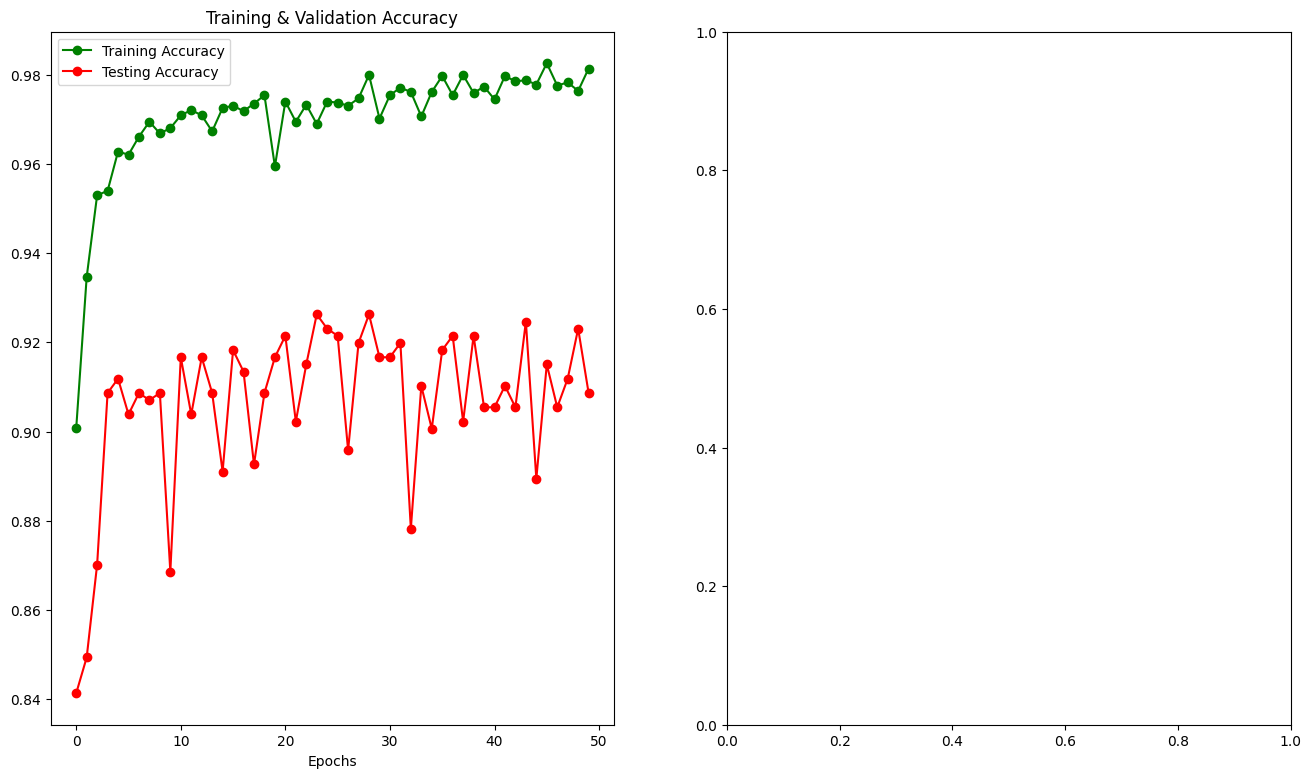

In [7]:
import matplotlib.pyplot as plt
# epo = 
r = history
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = r.history['accuracy']
train_loss = r.history['auc']
val_acc = r.history['val_accuracy']
val_loss = r.history['val_auc']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")

In [8]:
import tensorflow as tf
import numpy as np
# !pip install img_to_array
from tensorflow.keras.utils import img_to_array
from keras.models import load_model
from PIL import Image

# Load the trained Keras model
model = load_model('pneumonia_model.h5')

# Load the test image
img_path = '/content/test/normal/IM-0009-0001.jpeg'
img = Image.open(img_path).convert('RGB')
img = img.resize((224, 224))

# Convert the image to an array and preprocess it
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

# Make predictions using the loaded model
prediction = model.predict(img_array)

# Print the predicted result
if prediction > 0.5:
    print('Pneumonia')
else:
    print('Normal')

1/1 [==============================] - 4s 4s/step
Normal
